### **Simple Linear Regression**
Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [60]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

## Step 1
Uploading the data using URL

In [61]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2
Plotting data in 2D to find any relationship between the data.

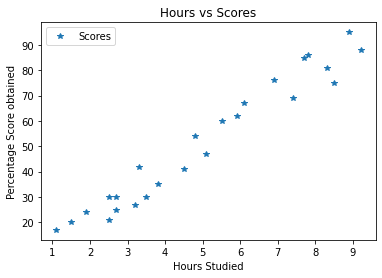

In [62]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores',style='*')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score obtained')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Step 3
Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [63]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

## Step 4
splitting this data into training and test sets using Scikit-Learn's built-in train_test_split() method

In [113]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) #test_size=.2 means 25% test data and 75% training data.

## Step 5
Training the data set using linear regression algorithm to fit the data into y=mx+c format

In [114]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

Modelling complete 

## Step 6
Actual plot vs Predicted plot

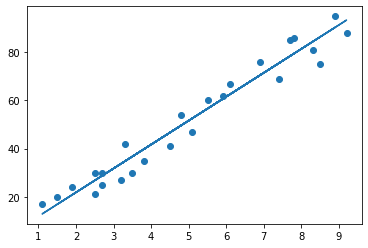

In [115]:
# Plotting the regression line
m=regressor.coef_
c=regressor.intercept_
y_predicted = m*X+c
# Plotting for the test data
plt.scatter(X, y) #actual dataset plot
plt.plot(X, y_predicted) #Predicated data plot
plt.show()

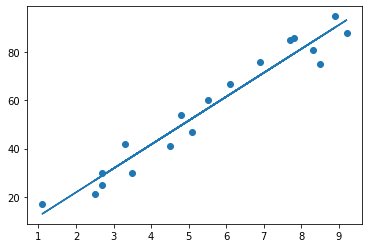

In [116]:
y_train_predicted = m*X_train+c
# Plotting for the test data
plt.scatter(X_train, y_train) #actual dataset plot
plt.plot(X_train, y_train_predicted) #Predicated data plot
plt.show()

## Step 7
Prediction of y_test_data using our trained algorithm

In [117]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores #same as y_pred=mX_test+c

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [118]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Step 8
Predicting Percentage score for 9.5 hours of study


In [119]:
my_hours=9.5
my_pred_score=m*my_hours+c
#my_score_1=regressor.predict(my_hours)
print("No of Hours = {}".format(my_hours))
print("Predicted Score = {}".format(my_pred_score[0]))


No of Hours = 9.5
Predicted Score = 96.37814847828855


## Step 9 (Final Step)
Evaluating the performance of this algorithm using the mean square error

In [120]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482
